# PROJETO SAE - SISTEMA DE APROVAÇÃO DE EMPRESTIMOS 

### Modelo de negócio
* Aplicação para empresas de empréstimos
*Análise do cliente para aprovação de crédito
*Resultado de aprovação do crédito com base nas informações do cliente

### Extraindo Insights (Análise dos dados)

In [1]:
#importando bibliotecas necessárias
import pandas as pd 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#Importanto base de dados 
base = pd.read_csv('/content/drive/MyDrive/Portfólio/SAE_Sistema_de_Aprovacao_de_Emprestimos/clientes.csv')

In [ ]:
#Lendo a base de dados
base.head()

,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Visualizando a quantidade de linhas e colunas
base.shape

(614, 13)

In [ ]:
#Visualizando informações do arquivo base 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cod_cliente           614 non-null    object 
 1   sexo                  601 non-null    object 
 2   estado_civil          611 non-null    object 
 3   dependentes           599 non-null    object 
 4   educacao              614 non-null    object 
 5   empregado             582 non-null    object 
 6   renda                 614 non-null    int64  
 7   renda_conjuge         614 non-null    object 
 8   emprestimo            592 non-null    float64
 9   prestacao_mensal      600 non-null    float64
 10  historico_credito     564 non-null    float64
 11  imovel                614 non-null    object 
 12  aprovacao_emprestimo  614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [ ]:
#Visualizando a quantidade de linhas nulas no dataframe
base.isnull().sum()

cod_cliente              0
sexo                    13
estado_civil             3
dependentes             15
educacao                 0
empregado               32
renda                    0
renda_conjuge            0
emprestimo              22
prestacao_mensal        14
historico_credito       50
imovel                   0
aprovacao_emprestimo     0
dtype: int64

In [ ]:
# Visualizando a quantidade de informações duplicadas
base.duplicated().sum()

0

Conhecendo a Distribuição dos campos de cada variável

In [ ]:
base.describe()

,renda,emprestimo,prestacao_mensal,historico_credito
count,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,146.412162,342.00000,0.842199
std,6109.041673,85.587325,65.12041,0.364878
min,150.000000,9.000000,12.00000,0.000000
25%,2877.500000,100.000000,360.00000,1.000000
50%,3812.500000,128.000000,360.00000,1.000000
75%,5795.000000,168.000000,360.00000,1.000000
max,81000.000000,700.000000,480.00000,1.000000


In [ ]:
# Tabela de Frequência da Variável "aprovacao_emprestimo" - Nossa Classe ou Label ou Target ou Y ou Variável a ser Predita (o que a gente quer descobrir)
base.aprovacao_emprestimo.value_counts()

Y    422
N    192
Name: aprovacao_emprestimo, dtype: int64

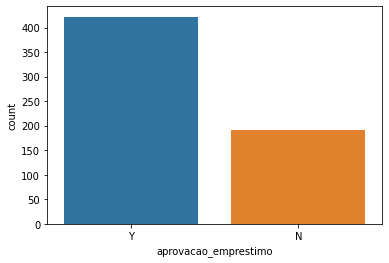

In [ ]:
#Criando gráfico de barras para variáveis categóricas ('aprovacao_emprestimo')
sns.countplot(base['aprovacao_emprestimo'])

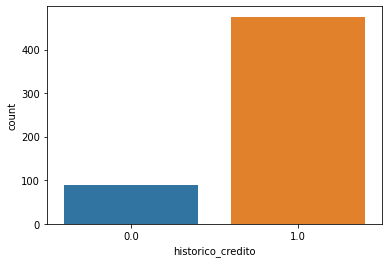

In [ ]:
#Criando gráfico de barras para variáveis categóricas ('historico_credito')
sns.countplot(base['historico_credito'])

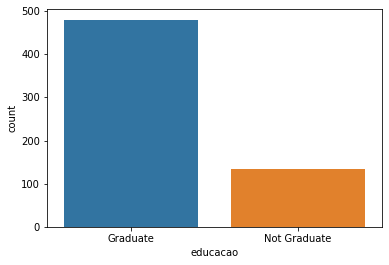

In [ ]:
#Criando gráfico de barras para variáveis categóricas ('educacao')
sns.countplot(base['educacao'])

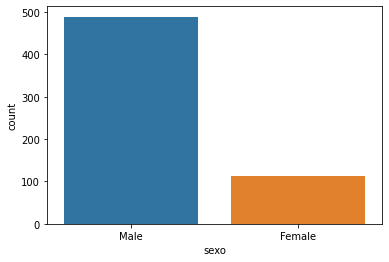

In [ ]:
#Criando gráfico de barras para variáveis categóricas ('sexo')
sns.countplot(base['sexo'])

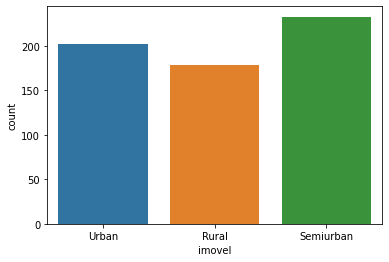

In [ ]:
#Criando gráfico de barras para variáveis categóricas ('imovel')
sns.countplot(base['imovel'])

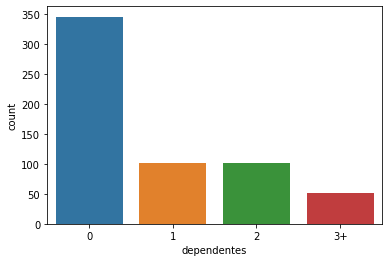

In [ ]:
#Criando gráfico de barras para variáveis categóricas ('dependentes')
sns.countplot(base['dependentes'])

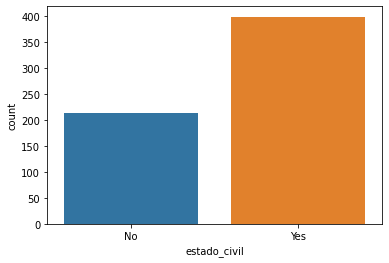

In [ ]:
#Criando gráfico de barras para variáveis categóricas ('estado_civil')
sns.countplot(base['estado_civil'])

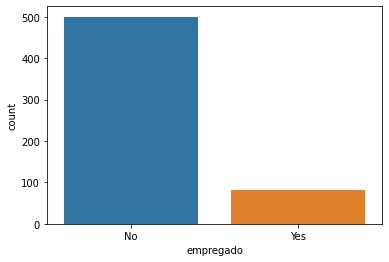

In [ ]:
#Criando gráfico de barras para variáveis categóricas ('empregado')
sns.countplot(base['empregado'])

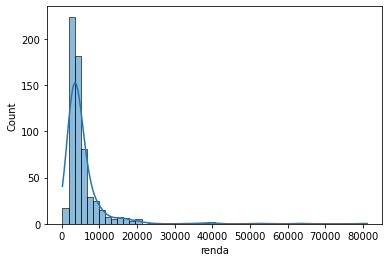

In [ ]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(base['renda'], bins=50, kde=True)

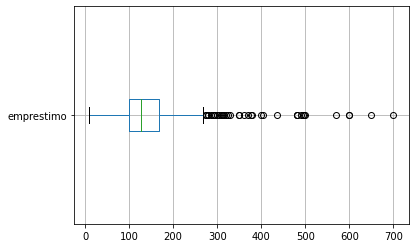

In [ ]:
#Distribuição dos dados BOXPLOT
base.boxplot(column='emprestimo', vert=False)

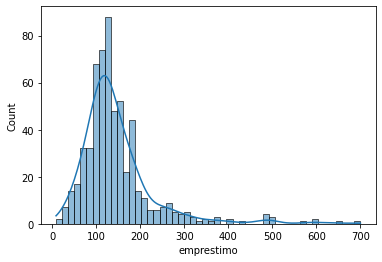

In [ ]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(base['emprestimo'], bins=50, kde=True)

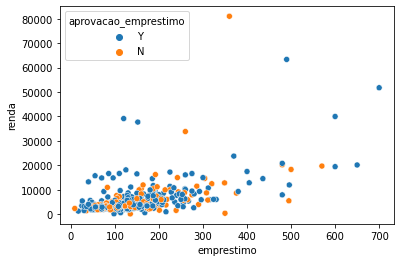

In [ ]:
# Correlação entre as Variáveis
sns.scatterplot(x="emprestimo", y="renda", hue="aprovacao_emprestimo", data=base)

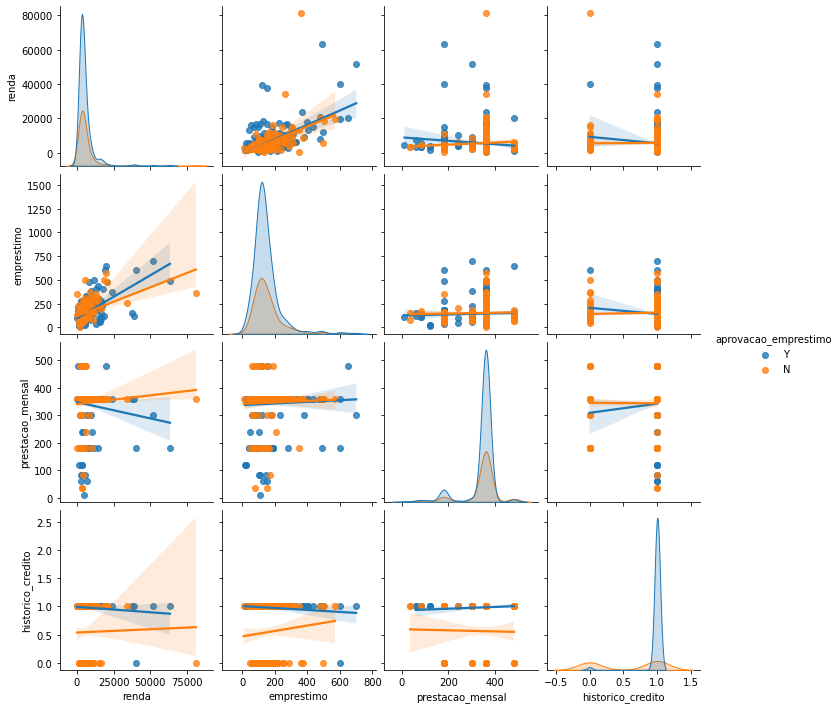

In [ ]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
sns.pairplot(base, hue='aprovacao_emprestimo', kind= 'reg') # kind=reg é a reta de regressão

# Pré-Processamento de dados 

In [ ]:
#Substituindo caracteres por números
base['sexo']= base['sexo'].map({'Male':0, 'Female':1})
base['estado_civil']= base['estado_civil'].map({'No':0, 'Yes':1})
base['aprovacao_emprestimo']= base['aprovacao_emprestimo'].map({'N':0, 'Y':1})

In [ ]:
base.head()

,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,LP001002,0.0,0.0,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,1


In [ ]:
# Eliminando valores Nulos
base = base.dropna()
base.isnull().sum()

cod_cliente             0
sexo                    0
estado_civil            0
dependentes             0
educacao                0
empregado               0
renda                   0
renda_conjuge           0
emprestimo              0
prestacao_mensal        0
historico_credito       0
imovel                  0
aprovacao_emprestimo    0
dtype: int64

In [ ]:
# Separando variáveis Explicativas e Variável TARGET
X = base[['sexo','estado_civil','renda','emprestimo','historico_credito']]
y = base.aprovacao_emprestimo
X.shape, y.shape

((480, 5), (480,))

In [ ]:
# importando Pacote para Amostragem dos Dados
from sklearn.model_selection import train_test_split

In [ ]:
# Realizando Amostragem dosa Dados
x_train, x_teste, y_train, y_teste = train_test_split(X,y, test_size = 0.2, random_state = 7)

# Construindo Máquina Preditiva 

###1° Versão da Máquina Preditiva: Criando um Baseline 
Criação da primeira versão da Máquina Preditiva, identificar a assertividade e melhorar o modelo se possível

In [ ]:
#Importando Pacotes para Construção das Máquinas Preditivas com Machine Learning

## Algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Criando a Máquina Preditiva com o Random Forest
maquina = RandomForestClassifier()
maquina.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Avaliando a máquina preditiva

In [ ]:
#Importando a Métrica de Avaliação
from sklearn.metrics import accuracy_score

In [ ]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com os dados de Treino
pred_maquina = maquina.predict(x_train)
accuracy_score(y_train, pred_maquina)

1.0

In [ ]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com dados de Teste
pred_maquina = maquina.predict(x_teste)
accuracy_score(y_teste, pred_maquina)

0.7395833333333334

###2° versão da Máquina Preditiva: Batendo baseline 

###Tunando (Calibrando) Hiperparâmetros do algoritmo
**A utilização de hiperparâmetros dentro do algoritmo RANDOM FOREST como o "max_depth" pode exatamente combater problemas de **Overfiting** **

+ **Underfiting**: Trata-se de quando o modelo preditivo não aprende de forma correta causando uma linha de aprendizado linear que não se aproxima dos valores acertivos. 

+ **Desired**: é quando o algoritmo consegue preditar de forma que os valores se aproximem ao valor real, tanto com os dados de treino quanto os dados de teste, dessa forma a acertividade fica coerente mesmo com inserção de novos dados.

+ **Overfiting**: Essa situação acontece quando o modelo preditivo acerta 100% nos dados de treino mas não se sai da mesma forma com os dados de teste, isso porque o modelo acaba aprendendo de forma que ele decora os resultados fazendo com que quando novos dados sejam inseridos ele não consiga preditar por estar "acostumado com um padrão".    

##**Usando o "max_depth" para diminuir "overfiting"**

In [ ]:
# Criando a Máquina Preditiva com o Random Forest 
maquina = RandomForestClassifier(max_depth=4, random_state=7)
maquina.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com os dados de Treino
pred_maquina_treino = maquina.predict(x_train)
accuracy_score(y_train, pred_maquina_treino)

0.8229166666666666

In [ ]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com dados de Teste
pred_maquina_treino = maquina.predict(x_teste)
accuracy_score(y_teste, pred_maquina_treino)

0.78125

Verificando variáveis mais impactantes no modelo

In [ ]:
#Importancia das Variáveis
maquina.feature_importances_

array([0.0226187 , 0.03447823, 0.17332143, 0.17593175, 0.59364989])

[0.0226187  0.03447823 0.17332143 0.17593175 0.59364989]


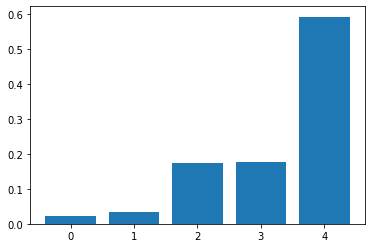

In [ ]:
#Importancia das Variáveis com Gráfico
print(maquina.feature_importances_)
#plot
from matplotlib import pyplot
pyplot.bar(range(len(maquina.feature_importances_)), maquina.feature_importances_)
pyplot.show()

In [ ]:
#['sexo', 'estado_civil', 'renda', 'emprestimo', 'historico_credito']

In [ ]:
#Salvando a máquina preditiva 
import pickle
pickle_out = open("maquina_preditiva.pkl", mode = "wb")
pickle.dump(maquina, pickle_out)
pickle_out.close()

#Implementendo o Modelo Preditivo para uma aplicação web

Instalando a o pacote de conexão do Sistema na Web 

In [ ]:
#Instalação do pacote necessário para conexão
!pip install -q pyngrok

In [ ]:
#pacote de instalação para os modulos web (estrutura do site)
!pip install -q streamlit 
!pip install -q steamlit_ace

ERROR: Could not find a version that satisfies the requirement steamlit_ace (from versions: none)
ERROR: No matching distribution found for steamlit_ace


Criando o Sistema 

In [ ]:
#Comando para criar o sistema em um arquivo app.py
%%writefile app.py

#Importando pacotes 
import pickle
import streamlit as st

#Carregando a Máquina Preditiva
pickle_in = open('maquina_preditiva.pkl', 'rb')
maquina_preditiva = pickle.load(pickle_in)

#Manter a sessão em cache
@st.cache()

#Criando a função que irá fazer a predição utilizando os dados inseridos pelo usuário do Sistema 
def prediction(sexo, estado_civil, renda, emprestimo, historico_credito):
  
    #Pre-processamento das entradas do usuário (convertendo valores de entrada str para int)
    if sexo == "Masculino":
        sexo = 0
    else:
        sexo = 1
    
    if estado_civil == "Solteiro(a)":
        estado_civil = 0
    else:
        estado_civil = 1

    if historico_credito == "Débitos Pendentes":
        historico_credito = 0
    else:
        historico_credito = 1

    emprestimo = emprestimo / 1000

    #Fazendo Predicoes
    prediction = maquina_preditiva.predict(
        [[sexo, estado_civil, renda, emprestimo, historico_credito]])
    
    if prediction == 0:
      pred = 'Rejeitado'
    else: 
      pred = 'Aprovado'
    return pred

#Essa função é para criação de webpage
def main():
  #Elementos da webpage
  #Nesse ponto acontece a personalização com comando html para visualização da pagina dinâmica 
  html_temp = """
  <div style ="background-color:black;padding:13px">
  <h1 style ="color:white;text-align:center;">SAE</h1>
  <h2 style ="color:white;text-align:center;">Sistema de Aprovação de Empréstimos - by Mauricio</h2>
  </div>
  """
  #Função do Streamlit que faz o display da webpage 
  st.markdown(html_temp, unsafe_allow_html = True)

  #As linhas abaixo criam as caixas na qual i usuário vai entrar com dados da pessoa que quer o empréstimo para fazer a Predição
  sexo = st.selectbox('Sexo',("Masculino","Feminino"))
  estado_civil = st.selectbox('Estado_Cvil',("Solteiro(a)","Casado(a)"))
  renda = st.number_input("Renda Mensal")
  emprestimo = st.number_input("Valor Total do Empréstimo")
  historico_credito = st.selectbox('Histórico de Créditos', ("Sem Débitos", "Débitos Pendentes"))
  result=""

  #Quando o Usuário clicar no botão "Verificar" a Máquina Preditiva faz seu trabalho 
  if st.button("Verificar"):
      result = prediction(sexo, estado_civil, renda, emprestimo, historico_credito)
      st.success('O empréstimo foi {}'.format(result))
      print(emprestimo)

if __name__=='__main__':
    main()

Writing app.py


Executando o Sistema 

In [ ]:
#Executa o sistema 
!streamlit run app.py &>/dev/null&

In [ ]:
# Importando a Biblioteca para Conexão do Sistema na WEB 
from pyngrok import ngrok

Publicando o sistema numa URL

In [ ]:
#Publica o sistema numa URL
public_url = ngrok.connect('8501')

Abrir o Sistema via Link que contém a palavra ngrok.io

In [ ]:
#URL do sistema 
public_url

<NgrokTunnel: "http://bea34fdd0cb0.ngrok.io" -> "http://localhost:8501">